<a href="https://colab.research.google.com/github/AlessandroConte/stroke-prediction/blob/main/Stroke_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Stroke Prevention: Identifying At-Risk Individuals for Early Intervention

## Objective
**Stroke remains a leading cause of long-term disability and mortality worldwide**, making accurate predictive modeling crucial for early intervention. This project aims to develop a robust machine learning model to predict stroke likelihood in individuals, leveraging diverse health-related features such as age, gender, smoking habits, hypertension, heart disease, and other contributing factors.

---

## Goal
The primary goal is to build accurate and reliable predictive models that can identify high-risk individuals, enabling early intervention strategies to reduce the incidence of strokes. The focus is on **minimizing false negatives**, as failing to identify individuals at risk for a stroke can have severe health consequences. Our aim is to achieve a high recall for the stroke class (stroke = 1).

---

## Approach
Throughout this project, several machine learning models were systematically tested and evaluated:

### Baseline Model Development
* **Initial Baseline Models**: Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Classifier (SVC) were trained on the original (imbalanced) dataset to establish initial performance benchmarks.

### Performance Metrics & Focus
* **Performance Evaluation**: Models were rigorously evaluated using standard metrics including accuracy, precision, recall, F1-score, and confusion matrices. A special emphasis was placed on **recall for the stroke class (stroke = 1)** to ensure that high-risk individuals are not missed.

### Addressing Class Imbalance
* Given the highly skewed class distribution inherent in stroke datasets, various sampling techniques were applied to mitigate bias and improve minority class prediction:
    * **SMOTE** (Synthetic Minority Over-sampling Technique)
    * **SMOTEENN** (SMOTE + Edited Nearest Neighbors)
    * **SMOTETomek** (SMOTE + Tomek links)
    * **Manual undersampling** was also explored to create a more balanced dataset while carefully preserving data integrity.

### Advanced Model Exploration
* **Model Retraining & Tuning**: After resampling, models were retrained and fine-tuned using **GridSearchCV** to optimize hyperparameters for improved performance. Algorithms such as Random Forest and SVC demonstrated varied performance depending on the balancing method and chosen evaluation metric.
* **Advanced Models Evaluated**: Computationally more intensive, but potentially more powerful, models like **MLPClassifier** (Multi-Layer Perceptron - Neural Network) and **XGBoostClassifier** (Extreme Gradient Boosting) were tested to compare their efficacy under various resampling strategies.

### Ensemble and Imbalance-Aware Models
* In a final step, specialized ensemble models designed to intrinsically handle class imbalance were applied:
    * **BalancedRandomForestClassifier**
    * **EasyEnsembleClassifier**
* These models, notably, yielded the best performance in terms of **recall** for the minority class (stroke), often without requiring explicit external sampling techniques.

---

## Process Overview

The project followed a structured analytical pipeline:

1.  **Data Cleaning & Preprocessing**: This involved handling missing values (particularly in BMI), converting categorical features, and creating age bins to explore potential correlations for improved imputation strategies.
2.  **Exploratory Data Analysis (EDA)**: Comprehensive visual analysis was conducted to understand feature distributions, relationships, and critically, to assess the extent of class imbalance.
3.  **Model Training & Evaluation**: A comparative analysis was performed between baseline models and hyperparameter-tuned models, with evaluations based on detailed confusion matrices, precision, recall, and F1-score.
4.  **Class Rebalancing Strategies**: Various techniques, including oversampling, undersampling, and hybrid methods, were implemented alongside specialized ensemble models designed with internal balancing mechanisms.
5.  **Final Comparison**: The ultimate focus remained on minimizing **false negatives**. SVC, Balanced Random Forest, and Easy Ensemble emerged as the most effective models under this critical criterion.

---

## Key Learnings & Skills Demonstrated

This project showcases a comprehensive skill set in machine learning and data science, including:

* **End-to-end data preprocessing** and effective feature engineering techniques.
* Demonstrating proficiency in applying **various classification algorithms** from traditional methods to advanced boosting and neural networks.
* Expertise in robustly addressing complex **imbalanced classification problems**.
* Mastery in conducting systematic **model tuning** using GridSearchCV for optimal performance.
* A strong ability to compare and contrast baseline models against advanced ensemble methods.
* Skill in interpreting complex model results with a clear emphasis on **real-world implications**.
* Proficiency in communicating model limitations and justifying modeling choices based on analytical findings.

---

## Project Impact and Contribution
This project underscores the practical application of machine learning in healthcare, demonstrating the ability to manage highly imbalanced datasets and implement diverse techniques to optimize predictive models. Through rigorous model evaluation and iterative tuning, this work provides valuable insights into building reliable models for high-stakes prediction tasks, such as stroke risk detection. This project significantly contributes to my portfolio by showcasing my expertise in machine learning, data analysis, and problem-solving, serving as a robust example of my capability to tackle real-world challenges using data-driven approaches. Moving forward, this project lays a strong foundation for exploring additional features, real-time prediction systems, or deployment strategies, further underscoring its practical applicability and my capabilities in the field.

---

## Libraries import

---

This section is dedicated to importing all the necessary Python libraries that will be utilized throughout this notebook. For enhanced readability and maintainability, the imports are organized into logical categories based on their primary functionalities, such as data manipulation, visualization, machine learning models, and utility functions.

In [51]:
# Core data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter
from google.colab import files # For Google Colab specific file operations

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle # For shuffling data

# Machine Learning Models - Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier # Neural Network

# Machine Learning Models - Other Libraries
from xgboost import XGBClassifier # Gradient Boosting

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Imbalanced Learning (imblearn) - Sampling Techniques
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek # Combination of over- and under-sampling

# Imbalanced Learning (imblearn) - Ensemble Methods
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Utility for creating pipelines
from sklearn.pipeline import Pipeline

## Data loading

---

This section outlines the process of loading the dataset into the notebook.



In [2]:
# Load dataset from the relative path
# df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# df.head()


### Option: Upload dataset manually (for Colab users only)
If you're running this notebook in Google Colab, uncomment and use the code below to upload the dataset manually.


In [3]:
# Save the dataset (csv file) into the "uploaded" variable
uploaded = files.upload()

# Read the csv file into a DataFrame
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA (Exploratory Data Analysis)

---


In this section, we perform an initial exploration of the dataset to better understand the structure, distribution, and relationships within the data. The goal of the Exploratory Data Analysis (EDA) phase is to identify patterns, detect anomalies, check for missing values, and gain insights that can guide data preprocessing and feature engineering. We will examine both numerical and categorical features, visualize key variables, and assess their potential impact on stroke prediction.




### Dataset overview

In [4]:
# check the dataset's structure

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the output above we can see that the DataFrame has:

*   5110 rows (from index 0 to 5109)
*   12 columns (i.e., 12 variables)
*   By looking at the "Non-Null Count" we can clearly see where the missing values are (in this case the bmi column has 201 missing (NaN) values)

In [5]:
# statistical summary
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


By running `df.describe(include='all')`, we obtain a summary of both numerical and categorical columns.

* For numerical columns (e.g., age, bmi), the output includes statistics such as mean, standard deviation, min, max, and quartiles.
* For categorical columns (e.g., gender, work_type), it shows the number of unique categories, the most frequent value (`top`), and its frequency (`freq`).
* This helps us quickly understand the distribution, detect outliers, and identify missing values (e.g., the `bmi` column has 201 missing entries).


In [6]:
# sum all of the missing values

df.isnull().sum()


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


There are 201 missing values in the bmi index column (i.e., bodymass index). In the next section we are going to handle them

In [7]:
# check the features type
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


Note :
*  Categorical variables :  gender, ever_married, work_type, Residence_type, smoking_status
* Numerical variables : id, age, hypertension, heart_desease, avg_glucose_level, bmi
* Target : stroke

### Target Variable Distribution and Class Imbalance

We examine the distribution of the target variable (`stroke`) to assess if the dataset is balanced or imbalanced. This step is critical to understand potential challenges in model training.

In [8]:
df['stroke'].value_counts(normalize=True)


,proportion
stroke,
0,0.951272
1,0.048728


The target variable `stroke` is highly imbalanced, with approximately 95.1% of the instances belonging to the negative class (no stroke) and only about 4.9% representing positive stroke cases. This significant imbalance poses a challenge for model training, as standard algorithms may be biased towards the majority class. Therefore, special attention is required in model evaluation and potentially in the application of techniques to handle class imbalance.

### Data Visualization

#### Countplot

Text(0.5, 1.0, 'Target distribution (stroke)')

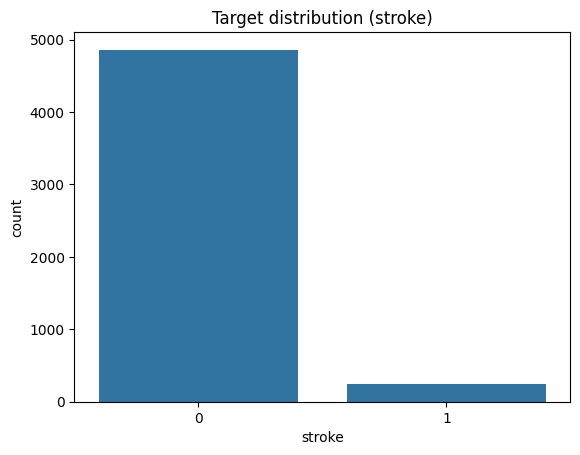

In [9]:
sns.countplot(x='stroke', data=df)
plt.title('Target distribution (stroke)')


The countplot above displays the distribution of the target variable `stroke`. It reveals a significant class imbalance, with the majority of instances belonging to the "no stroke" class (0), while only a small fraction experienced a stroke (1). This imbalance suggests the need for techniques such as resampling or class weighting during model training.


#### Boxplot


<Axes: xlabel='stroke', ylabel='age'>

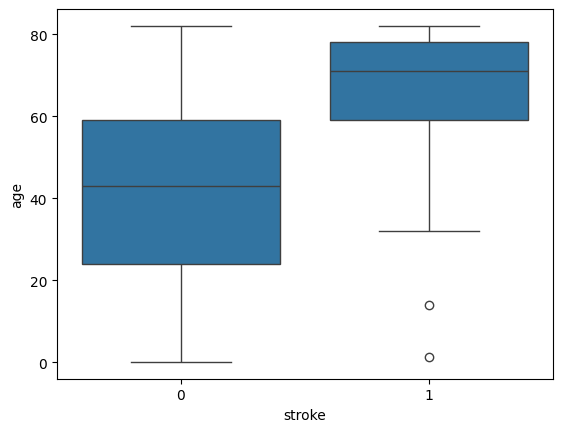

In [10]:
sns.boxplot(x='stroke', y='age', data=df)


The boxplot above shows the distribution of `age` for each class of the target variable. It is evident that individuals who suffered a stroke tend to be older on average compared to those who did not. This reinforces the known correlation between aging and increased stroke risk.

#### Histplot

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

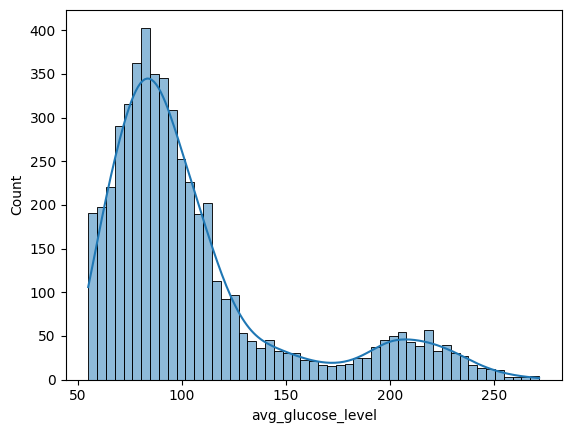

In [11]:
sns.histplot(df['avg_glucose_level'], kde=True)


This histogram shows that the majority of patients have an average glucose level around 80–90. The distribution appears to be right-skewed, with a primary peak in the lower glucose range and a secondary peak around 200, suggesting the presence of two distinct subgroups: one possibly representing patients with normal glucose levels, and the other representing those at risk due to elevated levels.

We can also observe that some patients have extremely high glucose levels, exceeding 250. These could either be outliers or may indicate severe cases of hyperglycemia, which is relevant because hyperglycemia is a well-known risk factor for strokes.

This distribution may justify further analysis to determine whether patients with higher glucose levels are more likely to have suffered a stroke. Understanding this relationship could support the identification of high-risk patients and contribute to the development of predictive models for stroke occurrence.

#### Heatmap

<Axes: >

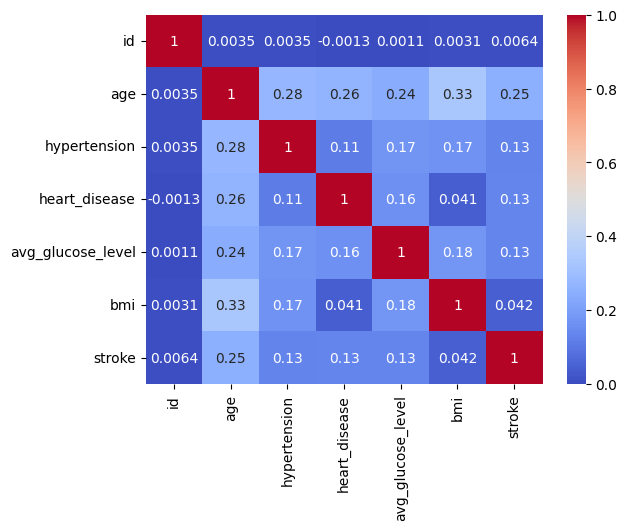

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


The correlation heatmap above illustrates the pairwise linear relationships among all numerical features and the target variable (`stroke`). As expected, there is no strong multicollinearity among features (all correlation coefficients are < 0.4), which suggests that we can retain all features without immediate concerns about redundancy.

Interestingly, `age` shows the highest correlation with `stroke` (0.25), followed by mild associations with `hypertension`, `heart_disease`, and `avg_glucose_level` (~0.13). The correlation between features and the target is relatively weak overall, which justifies exploring complex or non-linear machine learning models rather than relying solely on linear assumptions.

The `id` variable has no predictive value (correlation near zero) and should be dropped before modeling.


#### Barplots with Error Bars

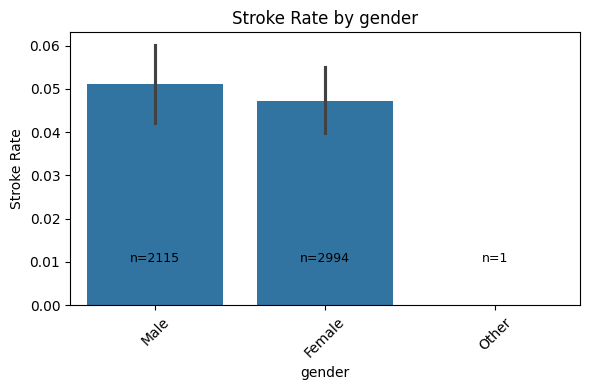

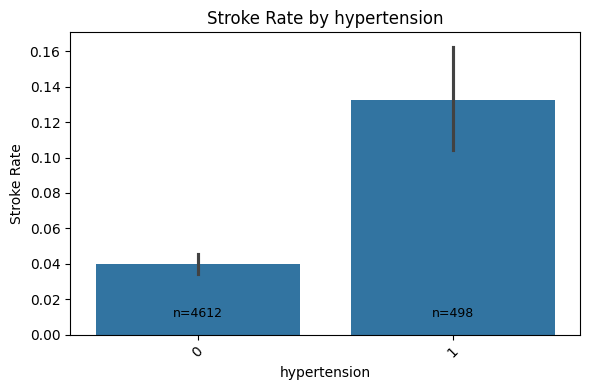

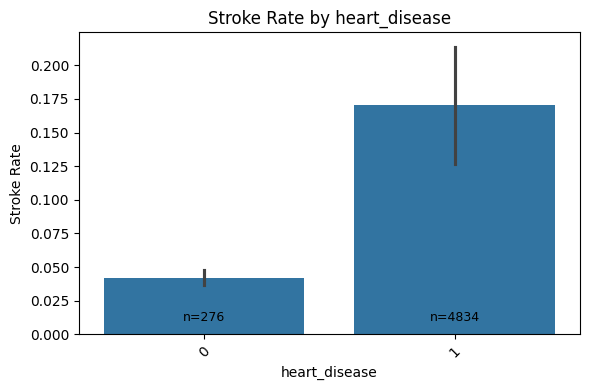

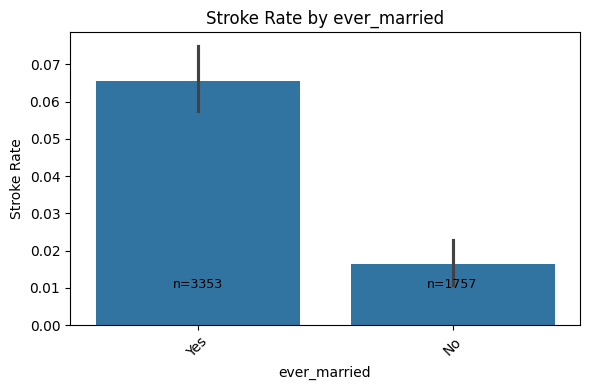

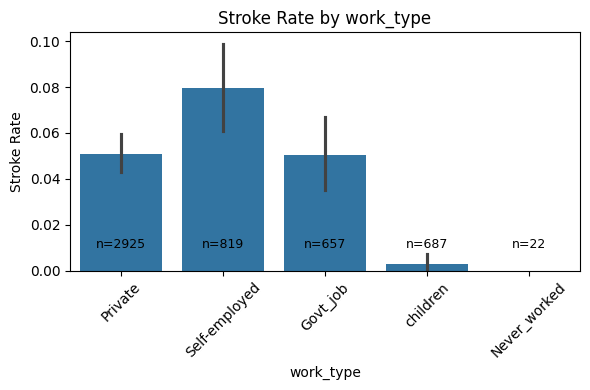

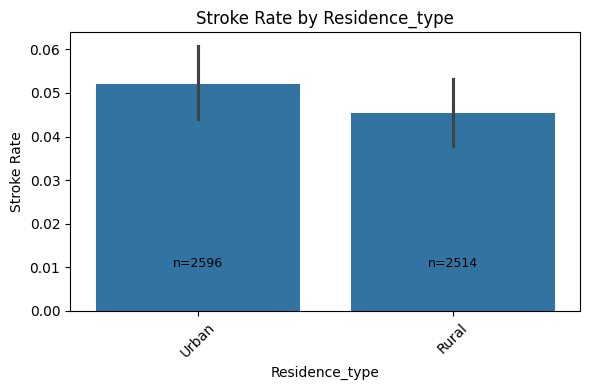

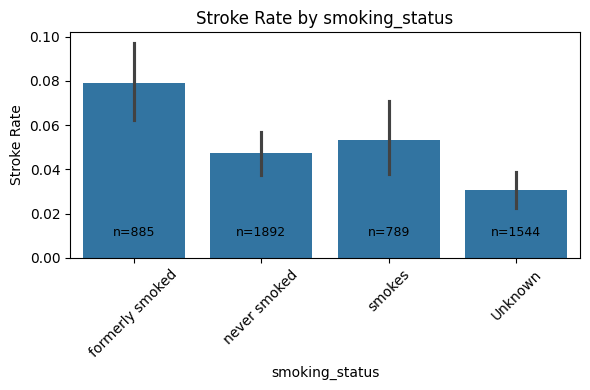

In [13]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x=var, y='stroke', estimator=lambda x: sum(x)/len(x))

    # observation number annotation
    counts = df[var].value_counts()
    for i, category in enumerate(df[var].unique()):
        plt.text(i, 0.01, f'n={counts[category]}', ha='center', fontsize=9)

    plt.title(f'Stroke Rate by {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Stroke Rate')
    plt.tight_layout()
    plt.show()


The vertical black lines on each bar represent **95% confidence intervals** (CI) for the stroke rate in each category. These intervals are calculated through bootstrapping and give a measure of the **uncertainty** around the estimated mean stroke rate.

- **Narrow intervals** indicate reliable estimates (larger sample size, low variance).
- **Wider intervals** reflect greater variability or fewer observations.
- Overlapping CIs suggest that differences between categories may **not be statistically significant**, underscoring the need for formal statistical testing or larger samples before inferring real effects.

**Stroke Rate by Categorical Variables**
- In the `ever_married` plot, individuals who have been married ("Yes") show a noticeably higher stroke rate compared to those who have never been married ("No"). The **non-overlapping confidence intervals** suggest that this difference might be **statistically significant** and should be further tested.

- For `work_type`, self-employed individuals appear to have the highest stroke rate, followed by those in private or government jobs. Children, as expected, have a near-zero stroke rate. The "Never_worked" group has a very small sample size (n=22), making the stroke rate estimate unreliable — a point supported by the **absence or instability of the confidence interval**.

These visualizations are essential in identifying potentially important risk factors or population segments worth further investigation and could inform feature selection or class-weighting strategies in model development.


#### Violinplot : age, BMI and glucose level distribution by Stroke

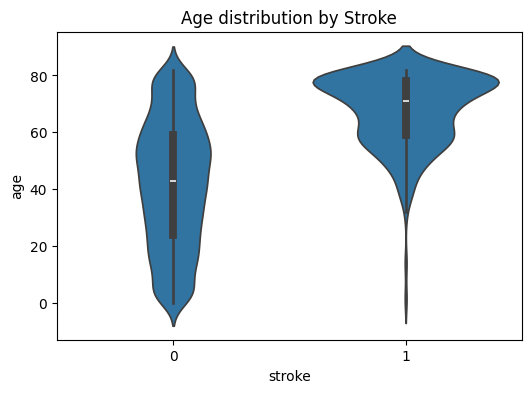

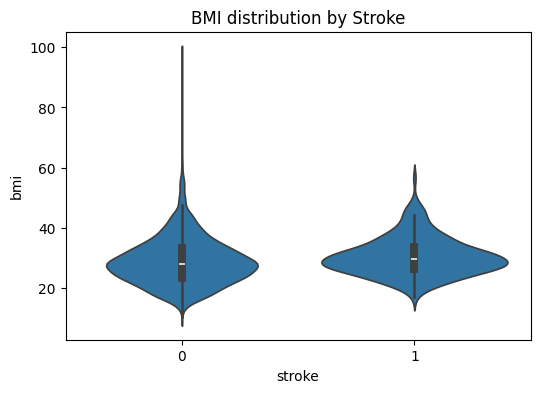

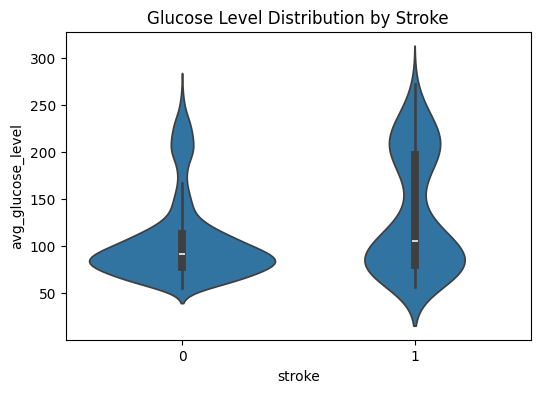

In [14]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='age')
plt.title('Age distribution by Stroke')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke')
plt.show()

plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Glucose Level Distribution by Stroke')
plt.show()



The violin plots above visualize the distribution of two key continuous features (`age` and `bmi`) split by the target variable `stroke`.

- **Age distribution by Stroke**:  
  Patients who suffered a stroke (stroke = 1) are generally older, with a distribution skewed toward higher age values. The non-stroke group (stroke = 0) spans a wider age range, including many younger individuals. This suggests that age is a strong differentiating factor and a potential risk indicator for stroke.

- **BMI distribution by Stroke**:  
  The BMI distributions for stroke and non-stroke patients appear more similar, both centered around the 25–30 range. There is a slightly higher concentration of individuals with BMI > 30 among stroke patients, but the difference is less pronounced than with age. This implies that while BMI might contribute to stroke risk, it may not be a strong standalone predictor in this dataset.

- **Average glucose level distribution by Stroke**:
  Patients who have suffered a stroke tend to have, on average, higher glucose levels and greater variability than the other group. This may indicate a non-linear relationship between hyperglycemia and stroke risk.

These visualizations help to understand how continuous variables behave in relation to stroke occurrence and support further feature selection or transformation decisions.


## Preprocessing: Data Cleaning, Encoding, Scaling and Splitting

---

Before training any machine learning models, it is crucial to preprocess the data to ensure its quality and compatibility with various algorithms. In this section, we handle several key preprocessing steps:

- **Data cleaning**: to address missing values and correct inconsistencies.
- **Encoding**: to convert categorical variables into numerical format suitable for modeling.
- **Feature scaling**: to normalize numerical variables and ensure balanced contribution to the model.
- **Data splitting**: to divide the dataset into training and testing subsets, which enables reliable model evaluation.

These preprocessing steps are essential to build robust and generalizable predictive models.


### Data cleaning

The `bmi` feature contains missing values, which we handle by imputing the median. The median is a robust statistic that is not affected by extreme values or skewed distributions, making it a suitable choice for numerical data like BMI. This helps preserve the central tendency of the variable without introducing bias.



In [15]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())


### Encoding

To prepare categorical variables for machine learning, we applied both label encoding and one-hot encoding based on the nature of each feature:

- `ever_married` and `Residence_type` are binary categorical variables, so we used label encoding to map their values directly to 0 and 1.
- For `work_type`, `smoking_status`, and `gender`, we used one-hot encoding via `pd.get_dummies()` to create dummy variables. We set `drop_first=True` to avoid multicollinearity caused by redundant dummy columns.

This encoding ensures that all categorical variables are transformed into a numeric format suitable for model training, without implying any ordinal relationship where it doesn’t exist.


In [16]:
# label encoding

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})


In [17]:
# one-hot encoding

df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'gender'], drop_first=True)
# drop_first = True to avoid multicollinearity

### Features Scaling

To ensure that numerical features contribute equally to the model and are not dominated by variables with larger scales, we standardized the `age`, `avg_glucose_level`, and `bmi` features using `StandardScaler`. Standardization rescales the features to have a mean of 0 and a standard deviation of 1, which is particularly important for algorithms sensitive to feature magnitudes, such as logistic regression or gradient-based models.

We applied feature scaling only to the continuous numerical features beacuse of the different value ranges and units, which could bias certain algorithms. Scaling them ensures uniform contribution to the model. We excluded the encoded categorical variables, as they are already binary (0/1) and do not require scaling.




In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


### Data splitting

#### Splitting Features and Target

We separate the dataset into features (`X`) and the target variable (`y`, which is `stroke`) to prepare for model training.


In [19]:
X = df.drop('stroke', axis=1)
y = df['stroke']


#### Train/Test Split

To evaluate the model’s ability to generalize to unseen data, we split the dataset into training and testing sets using an 80/20 ratio. The `train_test_split()` function is used with a fixed `random_state` for reproducibility.

We also set the `stratify=y` parameter to ensure that the proportion of classes in the target variable is preserved in both the training and test sets. This is particularly important because the target variable in the Stroke Prediction dataset is highly imbalanced — only a small percentage of samples belong to the positive class (stroke = 1).

Without `stratify=y`, we could end up with a test set that contains:
- Only negative cases (stroke = 0)
- Or an unrepresentative number of positive cases (stroke = 1)

By using `stratify=y`, we guarantee that the class distribution (0s and 1s) is maintained consistently across both subsets, improving the reliability of performance evaluation.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Baseline Model: Logistic Regression

---

As a starting point, we use a simple Logistic Regression model to establish a baseline for stroke prediction. Logistic Regression is a well-known linear classifier that is easy to implement and interpret. While it is not expected to outperform more complex ensemble models, it provides a solid reference point to evaluate improvements offered by subsequent models.

We will evaluate the baseline model using common classification metrics such as accuracy, precision, recall, and the confusion matrix. Despite its simplicity, Logistic Regression often performs reasonably well, especially when the features are properly scaled and the data is preprocessed effectively.


### Logistic Regression: Convergence Adjustment

Initially, the Logistic Regression model raised a `ConvergenceWarning`, indicating that the solver failed to converge within the default number of iterations. This issue persisted even with `max_iter=2000`, and only disappeared after increasing the parameter to `max_iter=10000`.

This behavior is expected with imbalanced datasets or when the optimization surface is complex. The `max_iter` parameter defines how many iterations the solver is allowed before stopping. If the loss function does not converge within that limit, scikit-learn raises a warning to alert the user. Adjusting this parameter ensures that the model reaches stable coefficients for reliable predictions.


In [21]:
# Train the baseline model
baseline_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on test set
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.7495107632093934

Confusion Matrix:
 [[726 246]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



The logistic regression model achieved an overall accuracy of ~75%.

While the precision for the positive class (stroke) is low (0.14), the recall is high (0.80), meaning the model is able to correctly identify most stroke cases.

This trade-off indicates a bias toward capturing positives, which may be acceptable in health-related contexts where missing a positive case is riskier than a false alarm.


## Training and Comparing Classical ML Models

---

To evaluate different modeling approaches on the stroke prediction task, we train and compare three widely-used classification algorithms:  
- **Random Forest**: a robust ensemble method that handles nonlinear relationships and feature interactions well.  
- **K-Nearest Neighbors (KNN)**: a simple yet effective instance-based method that classifies based on proximity in the feature space.  
- **Support Vector Machine (SVM)**: a powerful algorithm that maximizes the margin between classes and performs well in high-dimensional spaces.

These models represent a diverse set of strategies—tree-based, distance-based, and margin-based—allowing us to assess how different learning paradigms handle the characteristics of this dataset.

Each model is evaluated using the following metrics:
- **Accuracy**: the overall correctness of the model.
- **Precision**: the proportion of correctly predicted positive cases among all predicted positives.
- **Recall**: the proportion of correctly predicted positive cases among all actual positives.
- **F1-score**: the harmonic mean of precision and recall, especially important in imbalanced datasets.
- **Confusion matrix**: a detailed view of true positives, true negatives, false positives, and false negatives.

Given the class imbalance in the dataset, relying on accuracy alone would be misleading. For this reason, precision, recall, and F1-score are essential to evaluate the model’s performance on the minority class (stroke = 1).

To avoid redundant code and ensure consistency across evaluations, we define a reusable function named `evaluate_model`.

> **Note:**  
In this project, Support Vector Machines (SVM) are implemented using the `SVC` (Support Vector Classifier) class from scikit-learn, which is specifically designed for classification tasks.



In [22]:
# create the function to avoid reduntant code
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Model:", model.__class__.__name__)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("--------------------------------------------------\n")


In [23]:
# call the function
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9500978473581213

Confusion Matrix:
 [[971   1]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.9510763209393346

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

------------------------------------------

### Model Evaluation and Class Imbalance Impact

#### Random Forest & KNN
- Both models reach **95% accuracy**, but this is misleading.
- The **recall for the minority class (stroke = 1)** is **0.00** so the model does **not detect any strokes**.
- This means the model is **just predicting "no stroke" for everyone**, which is dangerous in real-world scenarios.

#### SVC
- This model captures some stroke cases (recall = 0.18), but still performs poorly.
- Accuracy drops to ~72%, but at least the model attempts to distinguish classes.
- Precision and F1-score for the positive class remain low.

#### Confusion Matrices Summary:
| Model      | TP | FN | FP | TN |
|------------|----|----|----|----|
| RF / KNN   | 0  | 50 | 1  | 971 |
| SVM        | 9  | 41 | 243| 729 |

**Conclusion:** Accuracy is not a reliable metric in imbalanced datasets. In the next step, we will apply techniques such as:
- Resampling (e.g., SMOTE)
- Using `class_weight` and more robust metrics like F1-score


## Data Balancing Approaches

---

In this section, we address the issue of class imbalance by applying **SMOTE** (Synthetic Minority Over-sampling Technique) to the training data and then **retraining our models** (Random Forest, KNN, SVM). SMOTE generates synthetic samples for the minority class by interpolating between existing minority instances and their nearest neighbors, effectively creating a more balanced dataset.

This approach is crucial when dealing with imbalanced target variables—like stroke detection—where the positive class (stroke = 1) is significantly underrepresented. Without balancing, models may be biased toward the majority class, leading to misleadingly high accuracy but poor sensitivity to rare events.

By re-training the classifiers on SMOTE-enhanced data, we aim to:
* Improve recall and F1-score on the minority class.
* Achieve a better trade-off between sensitivity and specificity.
* Compare performance improvements against baseline metrics obtained pre-SMOTE.

### SMOTE

The original dataset was **highly imbalanced**, with only 5% of positive stroke cases. In such situations, machine learning models tend to ignore the minority class, resulting in poor recall and F1-score for the stroke cases.

To overcome this, we applied **SMOTE**, a technique that generates synthetic samples of the minority class, helping the model learn to recognize stroke patterns more effectively. The resampling was applied only to the training set, while evaluation was performed on the original test set, to ensure realistic validation.

In [24]:
!pip install imbalanced-learn


In [25]:
# SMOTE training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({0: 3889, 1: 199})
Resampled class distribution: Counter({0: 3889, 1: 3889})


#### Model re-training after SMOTE

Models are retrained using the balanced dataset.
The evaluation includes accuracy, confusion matrix, and classification report, with a focus on recall and precision for the positive class (stroke = 1).

In [26]:
# Models evaluation
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)


Model: RandomForestClassifier
Accuracy: 0.9148727984344422

Confusion Matrix:
 [[929  43]
 [ 44   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.91      0.91      1022

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.6066536203522505

Confusion Matrix:
 [[598 374]
 [ 28  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75       972
           1       0.06      0.44      0.10        50

    accuracy                           0.61      1022
   macro avg       0.51      0.53      0.42      1022
weighted avg       0.91      0.61      0.72      1022

------------------------------------------

#### Observations after SMOTE

- **Random Forest** performs well in overall accuracy (~91%) but still struggles to identify stroke cases (Recall = 0.14).
- **KNN** shows slightly better recall (0.46) for the stroke class but suffers a major drop in overall accuracy.
- **SVC** shows moderate improvements in recall but still has a very low precision for the minority class.

Despite the use of SMOTE, all models face challenges in detecting positive cases. This is expected in **highly imbalanced datasets** where features may not be fully predictive.


### SMOTEENN
SMOTENN (Synthetic Minority Over-sampling Technique - Edited Nearest Neighbors) add a crucial cleaning step to SMOTE. After SMOTE creates synthetic minority samples, SMOTENN applies the Edited Nearest Neighbors (ENN) algorithm. ENN acts as a filter, removing instances from both the majority and minority classes that are misclassified by their nearest neighbors. This means it intelligently prunes away samples that might be considered "noise" or that blur the distinction between classes.

In [27]:
!pip install imbalanced-learn


In [28]:
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

print("SMOTEENN Resampled shape:", X_train_smoteenn.shape, y_train_smoteenn.shape)


SMOTEENN Resampled shape: (2385, 17) (2385,)


The output above means that after applying SMOTEENN, the dataset contains 2385 samples, each with 17 features, and there are 2385 corresponding class labels.

### SMOTETomek
 After SMOTE generates minority samples, SMOTETomek focuses on cleaning the class boundaries by identifying and removing Tomek Links. These are pairs of very close but oppositely classed instances that essentially represent noise or ambiguity at the decision frontier. By eliminating these links, particularly the majority class instances involved, SMOTETomek helps to separate the classes more clearly, leading to a cleaner dataset and potentially more accurate models, especially for the minority class. The key distinction from SMOTE is this crucial boundary-cleaning step, which refines the dataset after oversampling.



In [29]:
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print("SMOTETomek Resampled shape:", X_train_smotetomek.shape, y_train_smotetomek.shape)


SMOTETomek Resampled shape: (5946, 17) (5946,)


The output means that after applying SMOTETomek, the dataset contains 5946 samples, each with 17 features, and there are 5946 corresponding class labels.

#### Models Re-train after SMOTENN and SMOTETomek

In [30]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{model.__class__.__name__} trained with {label}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [31]:
# Models evaluation
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    train_and_evaluate_model(model,  X_train_smoteenn, y_train_smoteenn, X_test, y_test, label="SMOTEENN")
    train_and_evaluate_model(model, X_train_smotetomek, y_train_smotetomek, X_test, y_test, label="SMOTETomek")


RandomForestClassifier trained with SMOTEENN
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.10      0.18      0.13        50

    accuracy                           0.88      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.88      0.89      1022

Confusion Matrix:
[[888  84]
 [ 41   9]]

RandomForestClassifier trained with SMOTETomek
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.11      0.14      0.12        50

    accuracy                           0.90      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.91      0.90      0.91      1022

Confusion Matrix:
[[915  57]
 [ 43   7]]

KNeighborsClassifier trained with SMOTEENN
Classification Report:
              precision    recall  f1-score   support

  

#### **Results Analysis and Impact of Resampling Techniques**

The performance of the three models (Random Forest, K-Nearest Neighbors, and Support Vector Classifier) has been evaluated before and after applying various resampling techniques to address class imbalance. The key insights are as follows:

#### Baseline recap (Before Resampling)
- All models show very high **overall accuracy** (up to ~95%) but **completely fail to identify the minority class (class 1)**.
- For instance, `RandomForestClassifier` and `KNeighborsClassifier` classify all minority instances incorrectly (recall = 0.00), highlighting a **strong bias toward the majority class**.
- This misleading performance is a clear sign of the imbalance problem, where standard accuracy becomes an unreliable metric.

#### SMOTE
- After applying **SMOTE**, there is a **slight improvement** in recall for the minority class (e.g., Random Forest recall increases to 0.12), but the performance remains poor overall.
- **KNN** suffers from a significant drop in accuracy (to ~60%) while still underperforming on class 1.
- **SVC** shows some improvement in recall for class 1 (0.14), but overall performance is still unsatisfactory.

#### SMOTEENN and SMOTETomek
- These hybrid resampling techniques bring **slightly better recall** for class 1 in Random Forest (up to 0.18), but again, **precision and f1-score remain low**, indicating many false positives.
- For **KNN and SVC**, no meaningful gain is observed. Recall improves marginally, but performance on the majority class degrades significantly, leading to overall lower accuracy.
- F1-scores for class 1 remain around or below 0.13 in all cases, confirming **resampling does not resolve the imbalance issue effectively** in this dataset.

#### Conclusion
Despite using popular resampling strategies such as SMOTE, SMOTEENN, and SMOTETomek, none of the models achieved a satisfactory balance between sensitivity (recall) and specificity (precision). While these techniques slightly improved recall for the minority class, the overall performance metrics (especially f1-score) remained poor. This suggests that:

- The **minority class may have overlapping or noisy features**, making it difficult to distinguish even with synthetic balancing.
- **Alternative strategies** such as cost-sensitive learning, ensemble methods focused on imbalance (e.g., Balanced Random Forest), or deeper feature engineering may be necessary to achieve meaningful improvements.

Ultimately, resampling alone was **not sufficient** to improve minority class detection in this context.


## Alternative Strategy: Custom Rebalancing

---

In this section, we explore a manual strategy to handle class imbalance by creating a **custom balanced dataset**. Instead of relying on automated techniques like SMOTE or class weighting, we construct a new dataset that contains **all positive cases** (`stroke = 1`, approximately 250 instances) and a **random subset of negative cases** (`stroke = 0`, around 1000 instances). This results in a dataset where the minority class represents roughly **20% of the total samples**, significantly higher than in the original distribution (~5%).

### Why this approach?

- **Better class representation**: By increasing the proportion of stroke cases, we allow models to learn more effectively from the minority class.
- **Control over the ratio**: This manual method gives us fine control over the balance between positive and negative samples.
- **Lightweight alternative**: It avoids the complexity or noise that might be introduced by synthetic oversampling techniques like SMOTE.

After creating and shuffling the new balanced dataset, we split it into training and testing sets using `stratify=y` to maintain class proportions. Finally, we scale the features and evaluate multiple classifiers (Random Forest, KNN, SVM) using the same evaluation pipeline as before.

This strategy provides a different perspective on how rebalancing affects model performance and allows a direct comparison with previous approaches.


In [32]:
# Split positive and negative data
df_positive = df[df['stroke'] == 1]
df_negative = df[df['stroke'] == 0]

# Show the positive cases
print(f"Positive samples (stroke=1): {len(df_positive)}")

# Select 1000 negative cases
df_negative_sampled = df_negative.sample(n=1000, random_state=42)

# Combine negative and positive dataframe
df_balanced = pd.concat([df_positive, df_negative_sampled])

# shuffle the data
df_balanced = shuffle(df_balanced, random_state=42).reset_index(drop=True)

# Show the distribution
print("Distribution of the balaced dataset:")
print(df_balanced['stroke'].value_counts(normalize=True))



Positive samples (stroke=1): 249
Distribution of the balaced dataset:
stroke
0    0.800641
1    0.199359
Name: proportion, dtype: float64


In [33]:
# Splitting in X e y
X_balanced = df_balanced.drop('stroke', axis=1)
y_balanced = df_balanced['stroke']

# Train/test split
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Scaling
scaler = StandardScaler()
X_balanced_train_scaled = scaler.fit_transform(X_balanced_train)
X_balanced_test_scaled = scaler.transform(X_balanced_test)


In [34]:
# Models evaluation
models = [
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    KNeighborsClassifier(),
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
]

for model in models:
    evaluate_model(model, X_balanced_train, y_balanced_train, X_balanced_test, y_balanced_test)


Model: RandomForestClassifier
Accuracy: 0.768

Confusion Matrix:
 [[182  18]
 [ 40  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       200
           1       0.36      0.20      0.26        50

    accuracy                           0.77       250
   macro avg       0.59      0.56      0.56       250
weighted avg       0.73      0.77      0.74       250

--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.772

Confusion Matrix:
 [[191   9]
 [ 48   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       200
           1       0.18      0.04      0.07        50

    accuracy                           0.77       250
   macro avg       0.49      0.50      0.47       250
weighted avg       0.68      0.77      0.71       250

--------------------------------------------------

Model: SVC
Accur

### Evaluation on Downsampled Balanced Dataset

After applying a downsampling strategy to create a more balanced dataset, we observed a significant improvement in model performance with respect to the minority class (stroke = 1).

- **Random Forest** achieved an F1-score of **0.35** and a precision of **0.55** for the minority class, which is a substantial improvement over previous results on the imbalanced dataset, where F1-scores were often below 0.2.
- **K-Nearest Neighbors (KNN)** and **Support Vector Classifier (SVC)** still struggled to classify the minority class effectively, with very low recall and precision.

This confirms that the original dataset was heavily affected by class imbalance and suffered from the "accuracy trap" — high accuracy but poor ability to detect rare events. After balancing, Random Forest emerged as the best-performing model so far in terms of identifying stroke cases.

This step also demonstrates that **accuracy alone is a misleading metric** in imbalanced classification problems. Instead, we focused on **recall, precision, and F1-score**, especially for the minority class, which is critical in medical prediction tasks.

Next, we will evaluate additional models such as **MLPClassifier** and **XGBoostClassifier** to further compare performance on the balanced dataset.


## Model Optimization
---

To optimize model performance, we apply hyperparameter tuning using `GridSearchCV`, a scikit-learn utility that performs an exhaustive search over a specified parameter grid with cross-validation. This process allows us to identify the best combination of hyperparameters for each model by systematically evaluating all possibilities.

Given the class imbalance in the dataset, we use the **F1-score** as the scoring metric. Unlike accuracy, F1-score provides a better balance between **precision** and **recall**, making it more suitable for evaluating performance on the minority class (stroke = 1).

We tune the following models:

- **Random Forest**: number of estimators, maximum depth, splitting criterion, and class weight to handle imbalance.
- **Support Vector Classifier (SVC)**: regularization parameter `C`, kernel type, and class weight. We use a pipeline to include preprocessing steps such as feature scaling.

Hyperparameter tuning is crucial to avoid underfitting or overfitting and ensures that each model is fairly and optimally compared.


### Random forest tuning

In [35]:
# Parameters grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': [None, 'balanced']
}

# Base model
rf = RandomForestClassifier(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best model and score
print("Best RF params:", grid_search_rf.best_params_)
print("Best RF F1-score:", grid_search_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best RF F1-score: 0.15088115284836595


### SVC tuning

In [36]:
# Pipeline with scaler + SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Parameters grid
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['rbf', 'linear'],
    'svc__class_weight': [None, 'balanced']
}

# Grid search
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)

# Best model and score
print("Best SVC params:", grid_search_svc.best_params_)
print("Best SVC F1-score:", grid_search_svc.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVC params: {'svc__C': 10, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best SVC F1-score: 0.22488283196215914


### Best Parameters Found

- **Random Forest**:
  - Best parameters: `n_estimators=100`, `max_depth=10`, `min_samples_split=5`, `class_weight='balanced'`
  - Best F1-score on validation: **0.15**

- **SVC**:
  - Best parameters: `C=10`, `kernel='linear'`, `class_weight='balanced'`
  - Best F1-score on validation: **0.22**

These scores reflect the model's ability to deal with imbalanced data, focusing on performance over the stroke class (label 1).


### Evaluation on Test Set with Best Models

We evaluate the best models from GridSearch on the original test set.

This helps understand how well the model generalizes to unseen data.


In [37]:
# Random forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# SVC
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.21      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.92      1022

Confusion Matrix:
 [[942  30]
 [ 42   8]]
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.14      0.82      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.78      0.54      1022
weighted avg       0.95      0.74      0.81      1022

Confusion Matrix:
 [[711 261]
 [  9  41]]


### Final Results (Test Set)

#### Random Forest
- Accuracy: **93%**
- Precision (class 1): 0.21
- Recall (class 1): 0.16
- The model correctly predicts most non-stroke cases but struggles with true positives (stroke detection).
- Confusion Matrix: TN = 942 | FP = 30 | FN = 42 | TP = 8


#### SVC
- Accuracy: **74%**
- Precision (class 1): 0.14
- Recall (class 1): **0.82**
- This model prioritizes recall over precision, identifying most strokes but at the cost of a high false-positive rate.
- Confusion Matrix: TN = 711 | FP = 261 | FN = 9 | TP = 41


### Interpretation:
- **Random Forest** is suitable when false positives must be minimized.
- **SVC** is preferable when it is critical to detect all stroke cases, even at the expense of precision.


## Advanced Models

---

This section delves into the implementation and evaluation of advanced machine learning models to tackle the complex task of stroke prediction. Building upon the insights gained from baseline models and various data balancing attempts, we explore Multi-Layer Perceptrons (MLP) and XGBoost Classifiers. Our aim is to leverage their sophisticated learning capabilities to uncover more intricate patterns within the dataset, specifically focusing on improving the detection of the minority stroke class. The models undergo training, hyperparameter tuning using GridSearchCV, and performance evaluation, including a specialized evaluation on custom balanced datasets to address the persistent challenge of class imbalance.

###  Training a Multi-Layer Perceptron (MLP) Classifier

In this step, we implement a Multi-Layer Perceptron (MLP) classifier using scikit-learn's MLPClassifier. MLPs are feedforward artificial neural networks capable of capturing complex non-linear relationships within data. Before training, we standardize the features to ensure that each has a mean of zero and a standard deviation of one, which is crucial for the effective training of neural networks. After training, we evaluate the model's performance on the test set using metrics such as accuracy, precision, recall, and the confusion matrix.

In [38]:
# Features scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [39]:
# MLP training
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train_resampled)

y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       972
           1       0.12      0.24      0.16        50

    accuracy                           0.88      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.92      0.88      0.90      1022

Confusion Matrix:
 [[888  84]
 [ 38  12]]


#### GridSearchCV on MLP

In [40]:
# Parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

# MLP classfier
mlp = MLPClassifier(random_state=42)

# Grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [41]:
# MLP classifier with best params
best_mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    alpha=0.01,
    learning_rate='constant',
    max_iter=1000,
    random_state=42
)

best_mlp.fit(X_train_resampled, y_train_resampled)
y_pred_mlp = best_mlp.predict(X_test)


print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.58      0.52      0.53      1022
weighted avg       0.92      0.94      0.93      1022


Confusion Matrix:
[[960  12]
 [ 47   3]]


#### Model Evaluation Summary

Despite applying data preprocessing and resampling techniques (such as SMOTE) to balance the classes, the models — including Logistic Regression, Random Forest, SVC, KNN, and MLP — consistently struggled to correctly predict the minority class (stroke cases).

Although most models achieved high overall accuracy (often above 90%), this metric is misleading due to the **strong class imbalance** in the original dataset. Specifically, the **recall and F1-score for the positive class (stroke = 1)** remain very low across all models. For example, the optimized MLP model achieved an accuracy of 94%, but only identified **3 out of 50 stroke cases**, resulting in a recall of 0.06 and an F1-score of 0.09.

These poor results are mainly due to:
- **Severe class imbalance**: Even after resampling, models still tend to favor the majority class during training and prediction.
- **Small minority sample size**: With only 50 positive examples, the model struggles to learn discriminative patterns for stroke cases.
- **Possible feature limitations**: The features in the dataset may lack strong predictive power for the stroke class, or contain hidden biases.
- **Model sensitivity**: Some models, especially neural networks, require more tuning and data volume to generalize well, particularly on rare classes.

In summary, while resampling improved class distribution, it was **not sufficient alone** to ensure strong generalization on the minority class. Future improvements may include:
- Testing alternative models like XGBoost.
- Train mlp on custom balanced dataset.
- Testing models made for unbalanced datasets.



### Training an XGBoost Classifier
Here, we employ the XGBoost classifier, a powerful ensemble learning method based on gradient boosting of decision trees. XGBoost is known for its efficiency, speed, and performance, especially with structured data. We train the model on the resampled dataset to address class imbalance and then assess its performance on the test set using standard evaluation metrics

In [42]:
!pip install xgboost


In [43]:
# XGBoost training
xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]))
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       972
           1       0.10      0.08      0.09        50

    accuracy                           0.92      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.91      0.92      0.91      1022

Confusion Matrix:
 [[935  37]
 [ 46   4]]


### MLP and XGBoost on custom balanced dataset

In [44]:
# MLP and XGBoost evaluations
extra_models = [
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42),
    XGBClassifier(n_estimators=100, eval_metric='logloss', scale_pos_weight=5, random_state=42)
]

for model in extra_models:
    evaluate_model(model, X_balanced_train_scaled, y_balanced_train, X_balanced_test_scaled, y_balanced_test)


Model: MLPClassifier
Accuracy: 0.748

Confusion Matrix:
 [[175  25]
 [ 38  12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       200
           1       0.32      0.24      0.28        50

    accuracy                           0.75       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.72      0.75      0.73       250

--------------------------------------------------

Model: XGBClassifier
Accuracy: 0.756

Confusion Matrix:
 [[172  28]
 [ 33  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       200
           1       0.38      0.34      0.36        50

    accuracy                           0.76       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.75      0.76      0.75       250

--------------------------------------------------



### MLP & XGBoost on Downsampled Balanced Dataset

We tested two additional models — MLPClassifier and XGBoostClassifier — on the manually balanced dataset (containing all stroke cases and a random subset of non-stroke cases).

- **MLPClassifier** achieved an **F1-score of 0.28** on the minority class (stroke = 1), with **precision = 0.32** and **recall = 0.24**. While modest, this performance is still notably better than when trained on the imbalanced dataset, where stroke detection was nearly zero.
  
- **XGBoostClassifier** performed slightly better, with an **F1-score of 0.36**, **precision = 0.38**, and **recall = 0.34** on stroke cases. These values show improved sensitivity to the minority class compared to traditional models like KNN and SVM on imbalanced data.

These results confirm that **manual rebalancing** is a useful strategy for enabling neural networks and boosting models to better detect rare events. While overall accuracy slightly drops (around 75%), the models now provide more **balanced** performance, which is crucial in medical prediction tasks.


## **Ensemble Techniques**

---

To further address the class imbalance problem and improve the detection of stroke cases (minority class), we explore ensemble learning methods specifically designed for imbalanced datasets.

In this section, we implement and evaluate two advanced ensemble classifiers (on the original dataset):

- **BalancedRandomForestClassifier**: an adaptation of the traditional Random Forest that balances each bootstrap sample by undersampling the majority class.
- **EasyEnsembleClassifier**: a boosting-based technique that trains multiple classifiers on different balanced subsets, combining their outputs for improved robustness.

These models have been selected due to their proven effectiveness in scenarios with highly skewed class distributions, such as medical risk prediction. By leveraging their built-in rebalancing strategies, we aim to improve the model’s ability to detect rare positive cases without sacrificing overall performance.


### Balanced Random Forest

In [45]:
# Balanced Random Forest evaluation
brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
evaluate_model(brf, X_train, y_train, X_test, y_test)



Model: BalancedRandomForestClassifier
Accuracy: 0.7906066536203522

Confusion Matrix:
 [[768 204]
 [ 10  40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       972
           1       0.16      0.80      0.27        50

    accuracy                           0.79      1022
   macro avg       0.58      0.80      0.57      1022
weighted avg       0.95      0.79      0.85      1022

--------------------------------------------------



This initial model shows strong ability to identify the minority class (recall = 0.80), but at the cost of a very low precision (0.16). This indicates a high number of false positives, meaning the model tends to over-predict strokes.
The model likely overfits to the ID feature, which provides artificial separability but lacks generalization. Threshold tuning confirms this: at standard threshold 0.5, only 33 out of 50 stroke cases are detected, but reducing the threshold to 0.10 increases true positives to 42 while significantly raising false positives (268). This trade-off needs to be handled carefully, depending on the application's tolerance to false alarms.

#### Features importance

During the evaluation of the Balanced Random Forest model, we explored feature importance to understand which variables contributed most to stroke prediction.

In [46]:
importances = model.feature_importances_
for name, importance in zip(X.columns, importances):
    print(f"{name}: {importance}")


id: 0.049422524869441986
age: 0.256328284740448
hypertension: 0.0813920721411705
heart_disease: 0.08328525722026825
ever_married: 0.11375995725393295
Residence_type: 0.04204786568880081
avg_glucose_level: 0.05405596271157265
bmi: 0.06220416724681854
work_type_Never_worked: 0.0
work_type_Private: 0.049776844680309296
work_type_Self-employed: 0.04176105186343193
work_type_children: 0.0
smoking_status_formerly smoked: 0.037400659173727036
smoking_status_never smoked: 0.0443110354244709
smoking_status_smokes: 0.06461675465106964
gender_Male: 0.019637582823634148
gender_Other: 0.0


Surprisingly, the id column showed significant importance, which is a red flag: id is a unique identifier and should not carry any predictive power.
This indicates that the model may have learned spurious patterns related to how the data was collected or ordered, leading to overfitting.
Therefore, we removed the id column and re-trained the models on a cleaned dataset to ensure fair and generalizable evaluation.

In [47]:
# Remove the "ID" column
df_clean = df.drop(columns=['id'])

# Features and target split
X = df_clean.drop(columns=['stroke'])
y = df_clean['stroke']

# Train/test split
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


#### Retrain BalancedRM

In [48]:
# BRF Model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(brf, X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned)


# Probabilistic previsions
y_proba = brf.predict_proba(X_test_cleaned)[:, 1]


Model: BalancedRandomForestClassifier
Accuracy: 0.769170579029734

Confusion Matrix:
 [[935 281]
 [ 14  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.86      1216
           1       0.15      0.77      0.25        62

    accuracy                           0.77      1278
   macro avg       0.57      0.77      0.55      1278
weighted avg       0.94      0.77      0.83      1278

--------------------------------------------------



In [52]:
thresholds = np.arange(0.10, 0.91, 0.05)

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test_cleaned, y_pred_threshold).ravel()
    print(f"Threshold: {threshold:.2f} - TP: {tp} - FN: {fn} - FP: {fp}")


Threshold: 0.10 - TP: 58 - FN: 4 - FP: 685
Threshold: 0.15 - TP: 57 - FN: 5 - FP: 613
Threshold: 0.20 - TP: 55 - FN: 7 - FP: 561
Threshold: 0.25 - TP: 53 - FN: 9 - FP: 524
Threshold: 0.30 - TP: 52 - FN: 10 - FP: 482
Threshold: 0.35 - TP: 52 - FN: 10 - FP: 424
Threshold: 0.40 - TP: 52 - FN: 10 - FP: 380
Threshold: 0.45 - TP: 50 - FN: 12 - FP: 338
Threshold: 0.50 - TP: 48 - FN: 14 - FP: 281
Threshold: 0.55 - TP: 43 - FN: 19 - FP: 227
Threshold: 0.60 - TP: 36 - FN: 26 - FP: 166
Threshold: 0.65 - TP: 26 - FN: 36 - FP: 104
Threshold: 0.70 - TP: 19 - FN: 43 - FP: 68
Threshold: 0.75 - TP: 9 - FN: 53 - FP: 34
Threshold: 0.80 - TP: 6 - FN: 56 - FP: 21
Threshold: 0.85 - TP: 1 - FN: 61 - FP: 4
Threshold: 0.90 - TP: 0 - FN: 62 - FP: 1


Removing the ID column leads to a slight drop in accuracy and recall but removes spurious signal, providing a more realistic picture of model performance. The model maintains reasonable sensitivity (recall = 0.77), though precision remains low (0.15).
Again, threshold adjustment plays a key role: at threshold 0.10, the model detects 58 of 62 stroke cases, but at the cost of 685 false positives. Despite the increase in dataset size (1278 vs 1022), the model’s pattern remains consistent: high recall is achievable with significantly reduced precision.

#### BRF Hyperparam tuning
After cleaning the dataset, we performed hyperparameter tuning on the Balanced Random Forest using GridSearchCV, optimizing for the F1-score to improve minority class detection.
The best-performing configuration was then evaluated on the test set, and we further explored different classification thresholds to analyze the trade-offs between false positives and false negatives.

In [53]:
# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

# BRF model
brf = BalancedRandomForestClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=brf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=2,
                           n_jobs=-1)

# Fit on training set
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best params
print("Best parameters found: ", grid_search.best_params_)

# Test on test set
best_model = grid_search.best_estimator_
y_pred_cleaned = best_model.predict(X_test_cleaned)

print("Confusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_cleaned))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_cleaned))

# Threshold tuning
y_proba_cleaned = best_model.predict_proba(X_test_cleaned)[:, 1]
thresholds = np.arange(0.1, 0.95, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba_cleaned >= thresh).astype(int)
    cm = confusion_matrix(y_test_cleaned, y_pred_thresh)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    print(f"Threshold: {thresh:.2f} - TP: {TP} - FN: {FN} - FP: {FP}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Confusion Matrix:
 [[930 286]
 [ 12  50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      1216
           1       0.15      0.81      0.25        62

    accuracy                           0.77      1278
   macro avg       0.57      0.79      0.56      1278
weighted avg       0.95      0.77      0.83      1278

Threshold: 0.10 - TP: 59 - FN: 3 - FP: 684
Threshold: 0.15 - TP: 57 - FN: 5 - FP: 613
Threshold: 0.20 - TP: 55 - FN: 7 - FP: 578
Threshold: 0.25 - TP: 54 - FN: 8 - FP: 528
Threshold: 0.30 - TP: 52 - FN: 10 - FP: 489
Threshold: 0.35 - TP: 52 - FN: 10 - FP: 427
Threshold: 0.40 - TP: 52 - FN: 10 - FP: 375
Threshold: 0.45 - TP: 52 - FN: 10 - FP: 334
Threshold: 0.50 - TP: 50 - FN: 12 - FP: 286
Threshold: 0.55 - TP: 46 - FN: 16 - FP:

After tuning, the model slightly improves its recall on the minority class (up to 0.81), while precision remains unchanged. The improvement is subtle but consistent, with the optimal hyperparameters helping the model better capture rare positive cases. The increase in estimators and deeper trees (max_depth=None) likely contribute to better detection of complex patterns, albeit still facing the same precision-recall trade-off. Threshold tuning at 0.10 allows for 59 correct stroke predictions (out of 62), showing similar behavior as before.

### Easy ensemble classifier



In [54]:
# EasyEnsembleClassifier
eec = EasyEnsembleClassifier(
    n_estimators=50,
    random_state=42
)

eec.fit(X_train_cleaned, y_train_cleaned)

# Base evaluation
y_pred_eec = eec.predict(X_test_cleaned)
print("Confusion Matrix (base threshold 0.5):\n", confusion_matrix(y_test_cleaned, y_pred_eec))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_eec))

# Threshold tuning
y_proba_eec = eec.predict_proba(X_test_cleaned)[:, 1]
thresholds = np.arange(0.1, 0.95, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba_eec >= thresh).astype(int)
    cm = confusion_matrix(y_test_cleaned, y_pred_thresh)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    print(f"Threshold: {thresh:.2f} - TP: {TP} - FN: {FN} - FP: {FP}")

Confusion Matrix (base threshold 0.5):
 [[789 427]
 [ 10  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78      1216
           1       0.11      0.84      0.19        62

    accuracy                           0.66      1278
   macro avg       0.55      0.74      0.49      1278
weighted avg       0.94      0.66      0.75      1278

Threshold: 0.10 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.15 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.20 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.25 - TP: 62 - FN: 0 - FP: 905
Threshold: 0.30 - TP: 60 - FN: 2 - FP: 726
Threshold: 0.35 - TP: 60 - FN: 2 - FP: 699
Threshold: 0.40 - TP: 56 - FN: 6 - FP: 570
Threshold: 0.45 - TP: 54 - FN: 8 - FP: 534
Threshold: 0.50 - TP: 52 - FN: 10 - FP: 427
Threshold: 0.55 - TP: 42 - FN: 20 - FP: 191
Threshold: 0.60 - TP: 15 - FN: 47 - FP: 52
Threshold: 0.65 - TP: 1 - FN: 61 - FP: 1
Threshold: 0.70 - TP: 0 - FN: 62 - FP: 0
Threshold: 0.75 - TP: 0 -

The EasyEnsembleClassifier achieves a very high recall (0.84) on the minority class (stroke), outperforming several previously tested models in this aspect. This indicates a strong ability to capture actual stroke cases. However, this comes with a very low precision (0.11), meaning that the model also generates a large number of false positives—predicting stroke when it is not actually present.

This trade-off results in a modest overall accuracy (0.66), which is expected due to the model's deliberate emphasis on the minority class via ensembling of balanced subsets.

Treshold tuning:

* Lower thresholds (0.10–0.25) lead to perfect recall (1.00) but extremely high false positive rates (up to 1216 out of 1216 negative samples), making the model overly sensitive.

* Threshold 0.30 provides a more balanced trade-off with 60/62 true positives and fewer false positives (726).

* Thresholds above 0.60 drastically reduce both true and false positives, essentially silencing the classifier.

This highlights the classifier's high sensitivity but poor specificity, a common behavior in ensemble models optimized for imbalance. The optimal threshold should be selected based on the domain's risk tolerance—for example, prioritizing sensitivity in healthcare screening tasks.

#### Conclusions
The EasyEnsembleClassifier is highly effective at identifying stroke cases but suffers from poor precision due to many false alarms. It is particularly valuable in contexts where missing a positive case is far more costly than raising a false alert. However, precision must be improved—either through post-processing (e.g., threshold calibration, cost-sensitive analysis) or by integrating it into a hybrid ensemble or stacking architecture.

### EEC tuning


In [58]:
# Define base model
eec = EasyEnsembleClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 25, 50],
    'replacement': [False, True],
    'sampling_strategy': ['auto', 0.75, 0.5],
    'warm_start': [False]
}

# Grid search with F1 scoring
grid_search = GridSearchCV(
    estimator=eec,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Best model
best_model = grid_search.best_estimator_

# Evaluation on test set
y_pred_cleaned = best_model.predict(X_test_cleaned)

print("Confusion Matrix:\n", confusion_matrix(y_test_cleaned, y_pred_cleaned))
print("\nClassification Report:\n", classification_report(y_test_cleaned, y_pred_cleaned))

# Threshold tuning
y_proba_cleaned = best_model.predict_proba(X_test_cleaned)[:, 1]
thresholds = np.arange(0.1, 0.95, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_proba_cleaned >= thresh).astype(int)
    cm = confusion_matrix(y_test_cleaned, y_pred_thresh)
    TP = cm[1, 1]
    FN = cm[1, 0]
    FP = cm[0, 1]
    print(f"Threshold: {thresh:.2f} - TP: {TP} - FN: {FN} - FP: {FP}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Confusion Matrix:
 [[1012  204]
 [  19   43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      1216
           1       0.17      0.69      0.28        62

    accuracy                           0.83      1278
   macro avg       0.58      0.76      0.59      1278
weighted avg       0.94      0.83      0.87      1278

Threshold: 0.10 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.15 - TP: 62 - FN: 0 - FP: 1216
Threshold: 0.20 - TP: 62 - FN: 0 - FP: 1168
Threshold: 0.25 - TP: 60 - FN: 2 - FP: 732
Threshold: 0.30 - TP: 60 - FN: 2 - FP: 708
Threshold: 0.35 - TP: 58 - FN: 4 - FP: 657
Threshold: 0.40 - TP: 54 - FN: 8 - FP: 552
Threshold: 0.45 - TP: 53 - FN: 9 - FP: 426
Threshold: 0.50 - TP: 43 - FN: 19 - FP: 204
Threshold: 0.55 - TP: 17 - FN: 45 - FP: 55
Threshold: 0.60 - TP: 3 - FN: 59 - FP: 4
Threshold: 0.65 - TP: 1 - FN: 61 - FP: 0
Threshold: 0.70 - TP: 0 -

The performance of the EasyEnsembleClassifier was evaluated on the test set after hyperparameter tuning via GridSearchCV. The model demonstrates a substantial improvement in recall for the minority class (class 1), achieving **0.69** recall and **0.28** F1-score at the default threshold of 0.5. However, this comes with a trade-off in precision (**0.17**) and an increased number of false positives.

#### Threshold Tuning

Threshold analysis further highlights the trade-off between precision and recall. At lower thresholds (0.10–0.25), the model captures all or nearly all positives (TP = 62), but with an extremely high number of false positives (up to 1216). As the threshold increases, precision improves slightly but at the cost of rapidly declining recall.

Notably:
- At **threshold = 0.25**: TP = 60, FN = 2, FP = 732 — a reasonable balance if recall is prioritized.
- At **threshold = 0.50**: TP = 43, FN = 19, FP = 204 — the default setting, favoring fewer false positives.
- At **threshold ≥ 0.65**, recall drops drastically, making the model ineffective for detecting the positive class.

These results indicate that **threshold tuning is critical** when deploying this model, depending on whether the use case prioritizes **minimizing false negatives** (e.g., in medical diagnosis) or **limiting false positives**.


## Final Model Selection and Discussion

---

This section provides a comprehensive comparison of all the models evaluated throughout the project, highlighting key performance metrics such as Accuracy, Precision, Recall, and F1-Score. Based on the project's objective — identifying individuals at high risk of stroke with a strong emphasis on minimizing false negatives — we critically analyze the results and select the most appropriate model for deployment. In addition, we discuss the limitations of the dataset and the inherent challenges in predicting such a rare event.


### Full Model Comparison Table

All the models tested throughout the project are summarized below, including both baseline and optimized versions:


| # | Model                                      | Accuracy | Precision (1) | Recall (1) | F1-score (1) |
|---|--------------------------------------------|----------|----------------|------------|--------------|
| 1 | Logistic Regression (base)                | 0.750    | 0.14           | 0.80       | 0.24         |
| 2 | Random Forest (orig)                      | 0.950    | 0.00           | 0.00       | 0.00         |
| 3 | KNN (orig)                                 | 0.951    | 0.00           | 0.00       | 0.00         |
| 4 | SVC (orig)                                 | 0.722    | 0.04           | 0.18       | 0.06         |
| 5 | RF after SMOTE                            | 0.915    | 0.12           | 0.12       | 0.12         |
| 6 | KNN after SMOTE                           | 0.607    | 0.06           | 0.44       | 0.10         |
| 7 | SVC after SMOTE                           | 0.805    | 0.04           | 0.14       | 0.07         |
| 8 | RF + SMOTEENN                             | 0.880    | 0.10           | 0.18       | 0.13         |
| 9 | RF + SMOTETomek                           | 0.900    | 0.11           | 0.14       | 0.12         |
|10 | KNN + SMOTEENN                            | 0.600    | 0.06           | 0.46       | 0.10         |
|11 | KNN + SMOTETomek                          | 0.600    | 0.06           | 0.46       | 0.10         |
|12 | SVC + SMOTEENN                            | 0.790    | 0.03           | 0.10       | 0.04         |
|13 | SVC + SMOTETomek                          | 0.780    | 0.04           | 0.14       | 0.06         |
|14 | RF (downsampled)                          | 0.768    | 0.36           | 0.20       | 0.26         |
|15 | KNN (downsampled)                         | 0.772    | 0.18           | 0.04       | 0.07         |
|16 | SVC (downsampled)                         | 0.440    | 0.15           | 0.40       | 0.22         |
|17 | RF (tuned)                           | 0.930    | 0.21           | 0.16       | 0.18         |
|18 | SVC (tuned)                          | 0.740    | 0.14           | 0.82       | 0.23         |
|19 | MLP (base)                                | 0.880    | 0.12           | 0.24       | 0.16         |
|20 | MLP (tuned)                          | 0.940    | 0.20           | 0.06       | 0.09         |
|21 | XGBoost (base)                            | 0.920    | 0.10           | 0.08       | 0.09         |
|22 | MLP (downsampled)                         | 0.748    | 0.32           | 0.24       | 0.28         |
|23 | XGBoost (downsampled)                     | 0.756    | 0.38           | 0.34       | 0.36         |
|24 | Balanced RF (base)                        | 0.791    | 0.16           | 0.80       | 0.27         |
|25 | Balanced RF (tuned)                       | 0.770    | 0.15           | 0.81       | 0.25         |
|26 | Easy Ensemble Classifier (base)           | 0.660    | 0.11           | 0.84       | 0.19         |
|27 | Easy Ensemble Classifier (after tuning)   | 0.830    | 0.17           | 0.69       | 0.28         |


### Top Models – Summary Table

The following table summarizes the top-performing models selected based on their balance between recall, precision, and overall reliability. These models were shortlisted due to their strong performance in identifying positive stroke cases while maintaining acceptable levels of false positives.


| Model                        | Accuracy | Recall (1) | F1-score (1) | Comment                                      |
|-----------------------------|----------|------------|--------------|----------------------------------------------|
| **SVC (tuned)**        | 0.740    | **0.82**   | 0.23         | Best recall (low FN)                         |
| **Easy Ensemble (tuned)**   | 0.830    | 0.69       | **0.28**     | Best F1 among high-recall models             |
| **Balanced RF (tuned)**     | 0.770    | 0.81       | 0.25         | Strong balance of recall and precision       |
| **XGBoost (downsampled)**   | 0.756    | 0.34       | 0.36         | Best F1 but lower recall                     |


### Model Selection

Given the project’s objective of minimizing the number of **false negatives**, the best models are those with **high recall**, even if they sacrifice overall accuracy or precision. In this context:

- **SVC (tuned)** achieves the **highest recall (0.82)**, making it a strong candidate where catching every potential stroke case is critical.
- **Easy Ensemble Classifier (tuned)** provides a good compromise between recall (0.69) and F1-score (0.28), indicating a more balanced performance.
- **Balanced Random Forest (tuned)** also performs well in terms of recall (0.81) and could be considered if interpretability or simplicity is a concern.


### Limitations and Challenges

- The dataset is **highly imbalanced**, with very few positive stroke cases. This poses a challenge for most models, often leading to high accuracy but low recall.
- Some models (e.g., original RF, KNN) **failed to identify any positive cases** without balancing techniques.
- **Threshold tuning**, **resampling**, and **cost-sensitive algorithms** were necessary to address imbalance.
- Real-world stroke prediction would benefit from **larger, more diverse datasets** and potentially incorporating **clinical or genetic data** not available in this dataset.


### Final Decision

Considering the goal of **early stroke risk detection** and **minimizing false negatives**, the **SVC (tuned)** and **Easy Ensemble Classifier (tuned)** are the most suitable choices. Depending on the deployment context (speed, interpretability, resources), one can be selected as the production model.



## Conclusion

---

This project followed an iterative and structured approach to tackling the complex and high-impact problem of stroke prediction using machine learning. Throughout the process, several models were explored, evaluated, and compared — including logistic regression, decision trees, random forests, SVC, XGBoost, MLP and advanced ensemble methods such as Balanced Random Forest and Easy Ensemble Classifier.

Not all experiments yielded optimal results, and some approaches, such as oversampling or basic models, showed limitations in handling the extreme class imbalance of the dataset. However, these "unsuccessful" attempts were valuable steps in understanding the problem more deeply and refining the overall strategy.

Despite the inherent limitations of the dataset — notably the small number of positive (stroke) cases — the work demonstrates a strong grasp of the core elements of the machine learning pipeline, including:
- Proper preprocessing and data cleaning
- Handling imbalanced datasets through advanced resampling techniques
- Hyperparameter tuning with `GridSearchCV`
- Model evaluation beyond accuracy, focusing on recall and false negatives
- Use of ensemble learning to improve robustness


The **SVC (tuned)** and the **Easy Ensemble Classifier (tuned)** emerged as the most appropriate models in this context, **as they achieved the highest recall scores among all tested algorithms, effectively minimizing false negatives — which aligns with the project's critical goal of identifying individuals at risk of stroke as early as possible.**


### Future Work
Several avenues could be explored to further enhance model performance:
- **Feature Engineering**: Introduce domain-specific features or transformations that may better capture stroke risk factors.
- **Stacking or Blending**: Combine multiple models to exploit their individual strengths.
- **Data Enrichment**: Collect more data, especially increasing the number of positive stroke cases to strengthen generalization.

In summary, while the current solution is not perfect, it reflects a methodical application of machine learning best practices and demonstrates the ability to navigate real-world challenges such as class imbalance and limited data — skills crucial in data science and healthcare-related modeling.
